# Evaluation of the python module SiPM/MPPC

### Module for testing Silicon Photo-Multipliers and Multi-Pixel Photon Counters. This python module allows users to performe noise analysis of SiPM/MPPCs: Dark Count Rate, Afterpulsing, and Crosstalk. Futhermore, the SiPM/MPPC module is capable to set SiPM arrays (MPPC) for large areas like Ring Imaging Cherenkov detectors, Cherenkov Telescopes, etc. Users can simulate ring or trace shape signals based on the expected number of photons generated by the source. The estimation of the signal to noise ratios (SNR) is also available.

Author: Dr. Jesús Peña Rodríguez\
Experiment: Compressed Baryonic Matter (CBM)\
Bergische Universität Wuppertal\
March, 2023

In [1]:
import SiPM_MPPC.sipm as sipm
import matplotlib.pylab as plt
import numpy as np

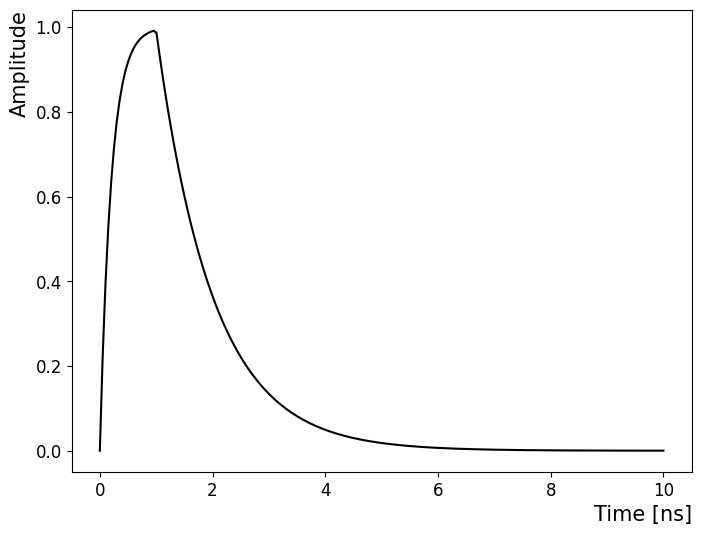

In [2]:
# Rt = 125e-9 # Rising time 5 
# Ft = 55e-9   # Falling time 50
# A = 1 # Pulse amplitude (spe) single photo-electron
# tm = 5e-9 # Maximum's peak time (s) 20
# R = 0.2 # Time resolution in ns 1

# Pulse shape

Rt = 0.2e-9 # Rising time 5 
Ft = 1e-9   # Falling time 50
A = 1 # Pulse amplitude (spe) single photo-electron
tm = 1e-9 # Maximum's peak time (s) 20
R = 0.05 # Time resolution in ns 1

# Pixel model

DCR = 150e3  # Hz/mm2
Pixel_size = 36.0 # mm2
Cross = 0.25 # %
After = 0.05 # %
sigma = 0.1 # Pulse amplitude variance
W = 1000 # Recording window in ns

Pulse_shape = sipm.Pulse(Rt, Ft, A, tm, R, plot=True)

In [3]:
# MPPC model

M = 3 # M x M array szie
N_pixel = M*M

Channels, time = sipm.MPPC(Pulse_shape, N_pixel, DCR, Pixel_size, Cross, After, W, R, sigma)

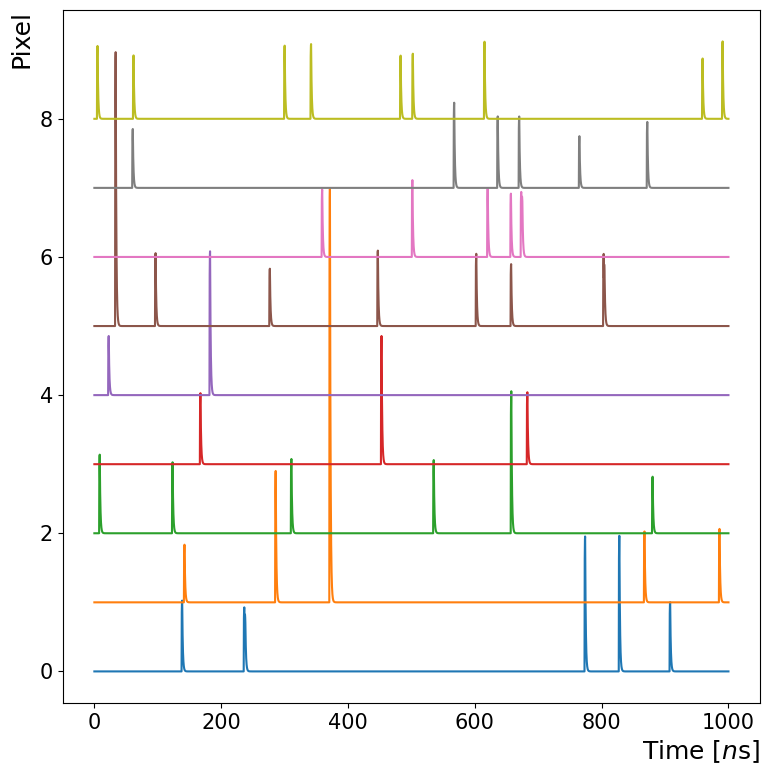

In [4]:
#%matplotlib inline

plt.figure(figsize=(9, 9))

for i in range(N_pixel):
    plt.plot(time, Channels[i,:]+i)
plt.xlabel("Time [$n$s]", horizontalalignment='right', x=1.0, fontsize=18)
plt.ylabel("Pixel", horizontalalignment='right', y=1.0, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# plt.savefig("Figures/SiPM_Res.eps", bbox_inches='tight', dpi=300)

plt.show()

<Figure size 500x500 with 0 Axes>

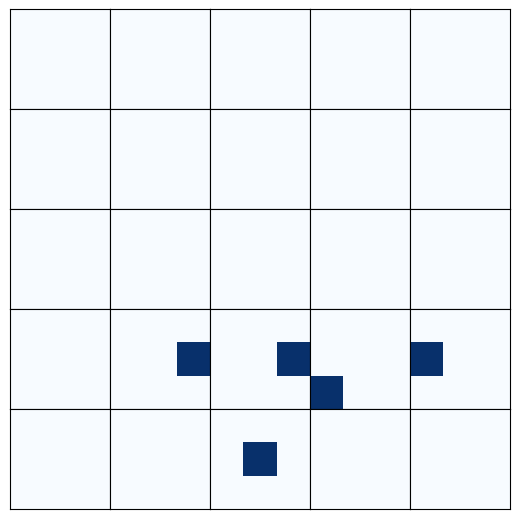

In [5]:
Nr = 5
Nc = 5
Th = 0.5 # Theshold in spe
t0 = 400 # Initial time of trigger in ns
Window = 5 # Coincidence window in ns

Noise_cam = sipm.Camera_noise(Pulse_shape, N_pixel, Pixel_size, M, DCR, Cross, After, W, R, sigma, Nr, Nc, t0, Window, Th)

In [6]:
r  = 6.0 # Cherenkov ring diameter in cm
Np_ring = 27 # Number of photons per ring
N_rings = 0 # Number of rings
    
Ring_array = sipm.Ring_generator(Nr, Nc, r, M, Np_ring, N_rings)

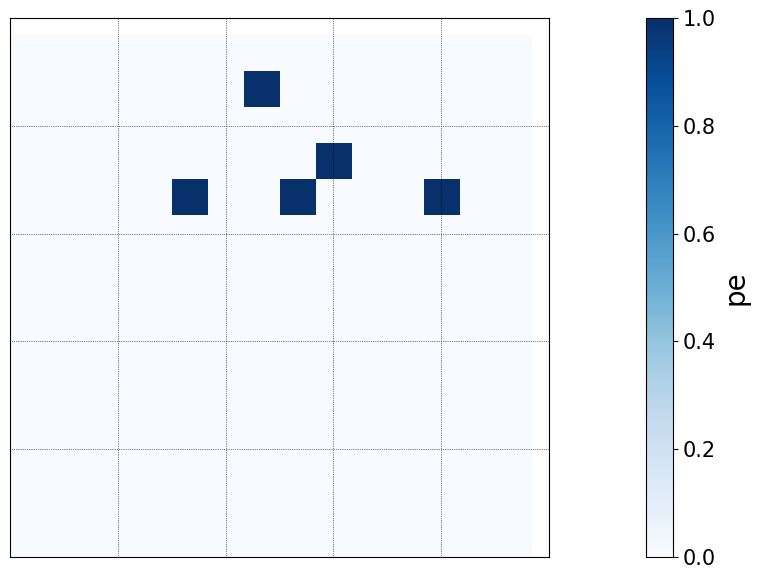

In [7]:
sipm.Camera_plot(Ring_array, Noise_cam, M, Nr, Nc)